In [10]:
import os
import json
import zipfile
import pandas as pd

directory_path = "D:\\OneDrive - Asia Pacific University\\Degree Year 3\\Sem 2\\Final Year Project\\Dataset\\Raw_video\\"
# List the contents of the directory
contents = os.listdir(directory_path)

counter = 0
basename = "dfdc_train_part_"

df_list = []

# Print the contents
for file in contents:  # Rename variable from zipfile to file

    # Open the ZIP archive in read mode
    with zipfile.ZipFile(f"{directory_path}{file}", 'r') as archive:
        # Read the content of the JSON file within the archive
        json_content = archive.read(f'{basename}{counter}/metadata.json')


        # Decode the JSON content to a string
        json_str = json_content.decode('utf-8')

        # Load the JSON string into a pandas DataFrame
        metadata = json.loads(json_str)

        df = pd.DataFrame.from_dict(metadata, orient='index')
        df['file_name'] = df.index
        df.reset_index(drop=True, inplace=True)

        df["path"] = f"{directory_path}{file}"

        counter += 1
        df_list.append(df)

# Concatenate all DataFrames into one
df = pd.concat(df_list)

# Print the final DataFrame
print(df)


     label  split        original       file_name  \
0     FAKE  train  wynotylpnm.mp4  owxbbpjpch.mp4   
1     REAL  train             NaN  vpmyeepbep.mp4   
2     REAL  train             NaN  fzvpbrzssi.mp4   
3     FAKE  train  wclvkepakb.mp4  htorvhbcae.mp4   
4     FAKE  train  vpmyeepbep.mp4  fckxaqjbxk.mp4   
...    ...    ...             ...             ...   
1731  FAKE  train  icffpvvtnu.mp4  ltiekbqamw.mp4   
1732  FAKE  train  icffpvvtnu.mp4  qxkhbvpomm.mp4   
1733  FAKE  train  rzytdiivhu.mp4  yxgljheoyy.mp4   
1734  FAKE  train  mhpavogfxb.mp4  wadgdooqpl.mp4   
1735  FAKE  train  icffpvvtnu.mp4  wwwbocaabd.mp4   

                                                   path  
0     D:\OneDrive - Asia Pacific University\Degree Y...  
1     D:\OneDrive - Asia Pacific University\Degree Y...  
2     D:\OneDrive - Asia Pacific University\Degree Y...  
3     D:\OneDrive - Asia Pacific University\Degree Y...  
4     D:\OneDrive - Asia Pacific University\Degree Y...  
...            

In [11]:
df

,label,split,original,file_name,path
0,FAKE,train,wynotylpnm.mp4,owxbbpjpch.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1,REAL,train,NaN,vpmyeepbep.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
2,REAL,train,NaN,fzvpbrzssi.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
3,FAKE,train,wclvkepakb.mp4,htorvhbcae.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
4,FAKE,train,vpmyeepbep.mp4,fckxaqjbxk.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...,...,...
1731,FAKE,train,icffpvvtnu.mp4,ltiekbqamw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1732,FAKE,train,icffpvvtnu.mp4,qxkhbvpomm.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1733,FAKE,train,rzytdiivhu.mp4,yxgljheoyy.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1734,FAKE,train,mhpavogfxb.mp4,wadgdooqpl.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [4]:
df.columns

Index(['label', 'split', 'original', 'file_name', 'path'], dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

label           0
split           0
original     2512
file_name       0
path            0
dtype: int64

In [5]:
df.describe()

,label,split,original,file_name,path
count,19909,19909,17397,19909,19909
unique,2,1,2512,19909,10
top,FAKE,train,ypgayhhaxx.mp4,owxbbpjpch.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
freq,17397,19909,39,1,3464


In [130]:
len(df)

19909

In [6]:
df = df.drop(["original", "split"], axis='columns')

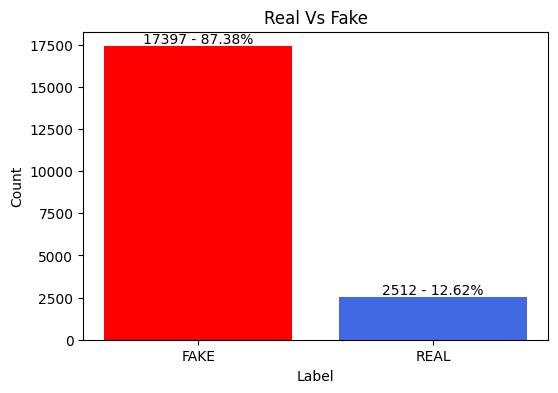

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
temp = df.groupby('label').size().reset_index(name='Count')
temp['Percentage'] = ((temp['Count'] / len(df)) * 100).round(2)
color = ["red","royalblue"]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars  = plt.bar(temp['label'], temp['Count'], color = color)
plt.title('Real Vs Fake')
plt.xlabel('Label')
plt.ylabel('Count')


# Add counts and percentages above the bars
for i, bar in enumerate(bars):
    count = bar.get_height()
    percentage = temp.loc[i, 'Percentage']
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, f'{count} - {percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [8]:
# check null value
df.isnull().sum()

label        0
file_name    0
path         0
dtype: int64

In [9]:
# Check if any video is missing or not found in the directory
df["path"]
df

,label,file_name,path
0,FAKE,owxbbpjpch.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1,REAL,vpmyeepbep.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
2,REAL,fzvpbrzssi.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
3,FAKE,htorvhbcae.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
4,FAKE,fckxaqjbxk.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
1731,FAKE,ltiekbqamw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1732,FAKE,qxkhbvpomm.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1733,FAKE,yxgljheoyy.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1734,FAKE,wadgdooqpl.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [121]:
missing_video = []
found = False

unique_path = df['path'].unique()

for item in unique_path:
    # Filter out row based on the path
    filtered_df = df[df['path'] == item]
    
    # Open the zipfile
    with zipfile.ZipFile(f"{item}", 'r') as archive:

        # Iterate through each row and search the video in zipfile
        for index, row in filtered_df.iterrows():
            found = False
            
            # Iterate over the file names in the ZIP archive
            for file_name in archive.namelist():
                if file_name.split("/")[1] == row.file_name:
                    found = True
                    break
                
            if not found:
                missing_video.append(row.file_name)
            
                 
print("Number of missing video: ", len(missing_video))


Number of missing video:  0


In [14]:
# Perform undersampling - randomly select rows with fake label
fake_sample = df[df['label'] == "FAKE"].sample(len(df[df['label'] == "REAL"]), random_state= 40)

final_df = pd.concat([fake_sample, df[df['label'] == "REAL"]])

In [15]:
fake_sample

,label,file_name,path
1311,FAKE,qudhlvaxtc.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
520,FAKE,jzxzzmcplq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1632,FAKE,pydbvfkslp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
915,FAKE,vytklfqusv.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1537,FAKE,dbzpqxlahq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
1121,FAKE,tdrewqtsgl.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1565,FAKE,rdvqwqapja.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1358,FAKE,ywoyowesnn.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
133,FAKE,dbsfikupsn.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [17]:
final_df = pd.concat([fake_sample, df[df['label'] == "REAL"]])

In [18]:
final_df

,label,file_name,path
1311,FAKE,qudhlvaxtc.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
520,FAKE,jzxzzmcplq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1632,FAKE,pydbvfkslp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
915,FAKE,vytklfqusv.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1537,FAKE,dbzpqxlahq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
1705,REAL,znlzegqkbp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1706,REAL,rzytdiivhu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1708,REAL,icffpvvtnu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1715,REAL,ucidfsqdkw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [22]:
# Save the dataframe
final_df.to_csv("D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\selected_video.csv", index=False)

In [2]:
import pandas as pd

In [6]:
final_df = pd.read_csv("D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\selected_video.csv")

In [7]:
final_df

,label,file_name,path
0,FAKE,qudhlvaxtc.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1,FAKE,jzxzzmcplq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
2,FAKE,pydbvfkslp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
3,FAKE,vytklfqusv.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
4,FAKE,dbzpqxlahq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
5019,REAL,znlzegqkbp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5020,REAL,rzytdiivhu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5021,REAL,icffpvvtnu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5022,REAL,ucidfsqdkw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


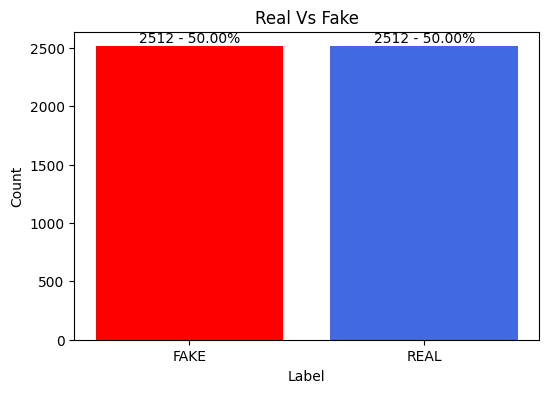

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
temp = final_df.groupby('label').size().reset_index(name='Count')
temp['Percentage'] = ((temp['Count'] / len(final_df)) * 100).round(2)
color = ["red","royalblue"]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars  = plt.bar(temp['label'], temp['Count'], color = color)
plt.title('Real Vs Fake')
plt.xlabel('Label')
plt.ylabel('Count')


# Add counts and percentages above the bars
for i, bar in enumerate(bars):
    count = bar.get_height()
    percentage = temp.loc[i, 'Percentage']
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, f'{count} - {percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [5]:
final_df["path"]

0       D:\OneDrive - Asia Pacific University\Degree Y...
1       D:\OneDrive - Asia Pacific University\Degree Y...
2       D:\OneDrive - Asia Pacific University\Degree Y...
3       D:\OneDrive - Asia Pacific University\Degree Y...
4       D:\OneDrive - Asia Pacific University\Degree Y...
                              ...                        
5019    D:\OneDrive - Asia Pacific University\Degree Y...
5020    D:\OneDrive - Asia Pacific University\Degree Y...
5021    D:\OneDrive - Asia Pacific University\Degree Y...
5022    D:\OneDrive - Asia Pacific University\Degree Y...
5023    D:\OneDrive - Asia Pacific University\Degree Y...
Name: path, Length: 5024, dtype: object

In [8]:
final_df[final_df['file_name'] == "agrzhzapku.mp4"]

,label,file_name,path
255,FAKE,agrzhzapku.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [ ]:
# Copy and paste video from zipfile
unique_path = final_df['path'].unique()


for path in unique_path:
    # Filter out row based on the path
    filtered_df = final_df[final_df['path'] == path]
    
    # Open the zipfile
    with zipfile.ZipFile(f"{path}", 'r') as archive:
        
        # Iterate through each row and search the video in zipfile
        for index, row in filtered_df.iterrows():
            
            destination_dir = "D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\Selected_video\\" + row.label 
            
            # Iterate over the file in the ZIP archive and extract the specific video
            for file in archive.namelist():
                
                if file.split("/")[1] == row.file_name:
                    archive.extract(file, destination_dir)
                    break
                


In [24]:
import cv2

def display_frame_from_video(video_path):

    capture_image = cv2.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

In [19]:
import os

folder_name = ["dfdc_train_part_0","dfdc_train_part_1","dfdc_train_part_2"]

base_path = "D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\Selected_video\\"

os.listdir("D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\Selected_video\REAL\dfdc_train_part_0")[0]

'aayrffkzxn.mp4'

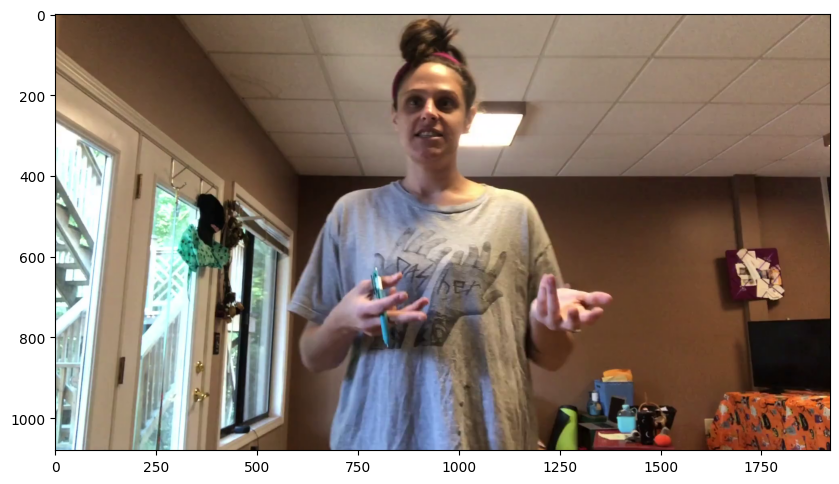

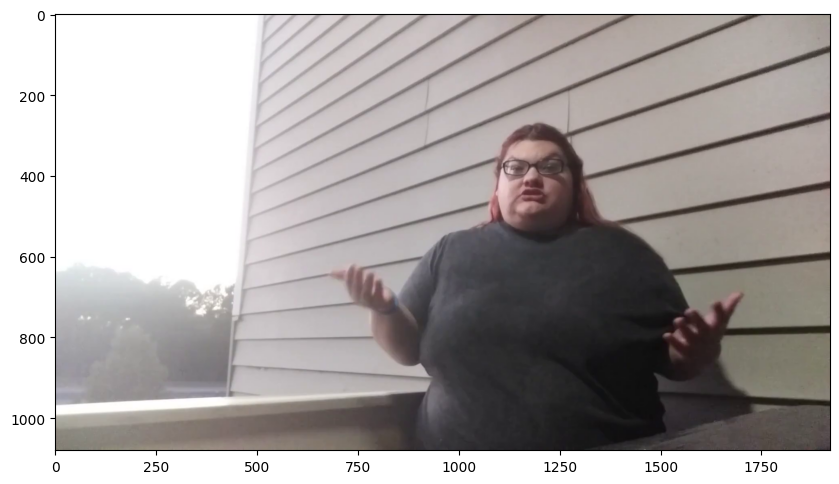

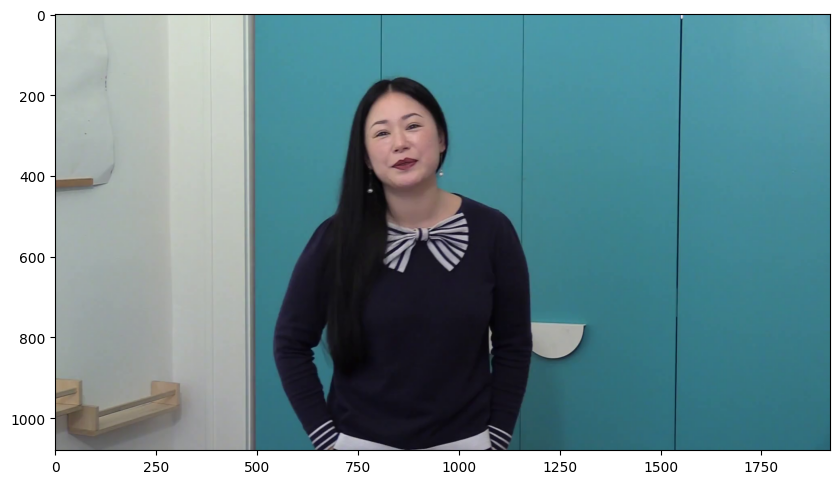

In [27]:
# Display example of real video
for folder in folder_name:
    path = base_path + "REAL\\" + folder

    video_name = os.listdir(path)[10]

    video_path = path + f"\{video_name}"

    display_frame_from_video(video_path)

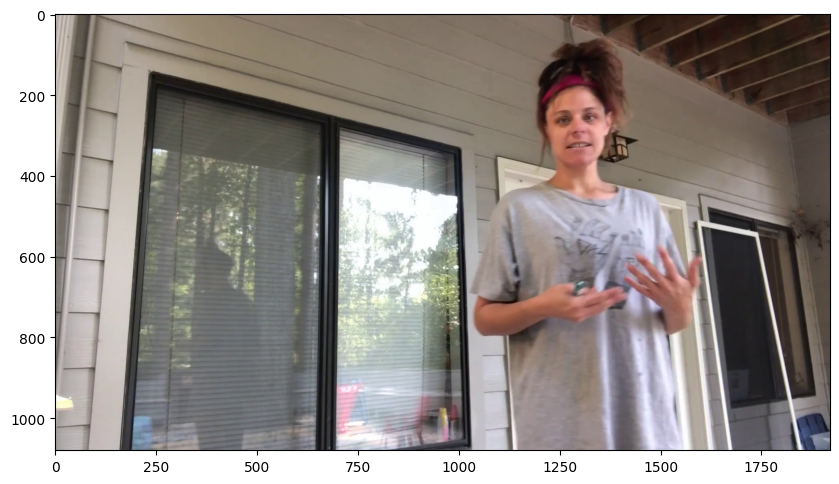

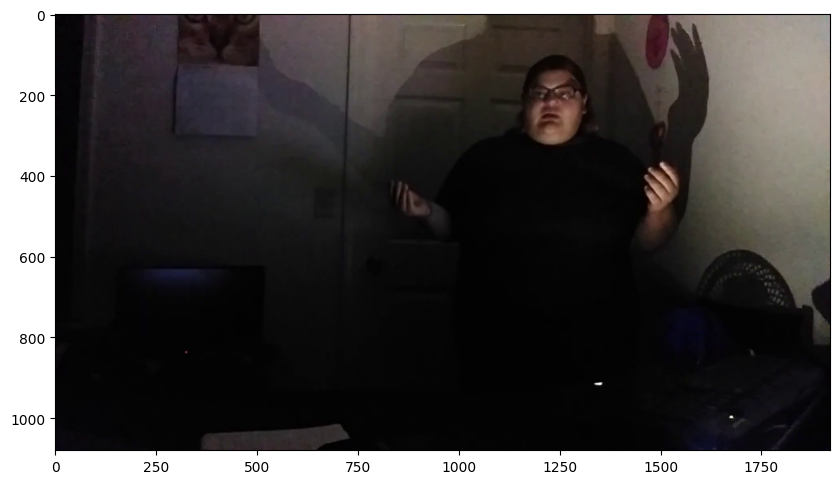

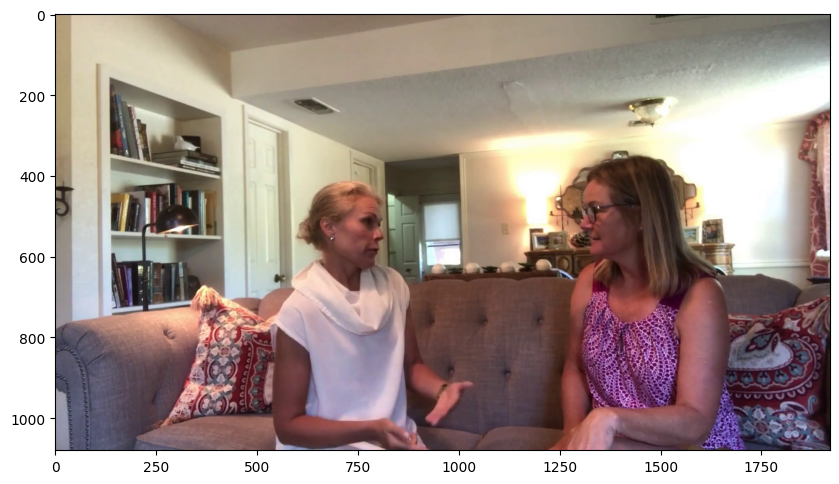

In [28]:
# Display example of fake video
for folder in folder_name:
    path = base_path + "FAKE\\" + folder

    video_name = os.listdir(path)[10]

    video_path = path + f"\{video_name}"

    display_frame_from_video(video_path)

In [34]:
total_frame = 0
total_video = 0
base_folder = "D:\OneDrive - Asia Pacific University\Degree Year 3\Sem 2\Final Year Project\Dataset\Selected_video"

for label in os.listdir(base_folder):
    base_folder_label = os.path.join(base_folder, label)

    for folder in os.listdir(base_folder_label):
        data_folder = os.path.join(base_folder_label,folder)

        for video in os.listdir(data_folder):
            video_path = os.path.join(data_folder, video)

            cap = cv2.VideoCapture(video_path)

            # Get the number of frames
            total_frame = total_frame + cap.get(cv2.CAP_PROP_FRAME_COUNT)
            total_video = total_video + 1

print("Avearge number of frame: ", int(total_frame/total_video))

Avearge number of frame:  294
